In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
df = pd.read_csv('madfhantr.csv')


In [3]:
# Display the first few rows of the dataset to understand its structure
print(df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
# Check for missing values and handle them if necessary
print(df.isnull().sum())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
df = df.dropna()

In [6]:
# Identify the features and target variable
X = df.drop('Loan_Status', axis=1)  # Features

In [7]:
y = df['Loan_Status']  # Target variable

In [8]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [10]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [11]:
# Train the classifier on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
# Evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.75

Confusion Matrix:
 [[19 19]
 [11 71]]

Classification Report:
               precision    recall  f1-score   support

           N       0.63      0.50      0.56        38
           Y       0.79      0.87      0.83        82

    accuracy                           0.75       120
   macro avg       0.71      0.68      0.69       120
weighted avg       0.74      0.75      0.74       120



In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

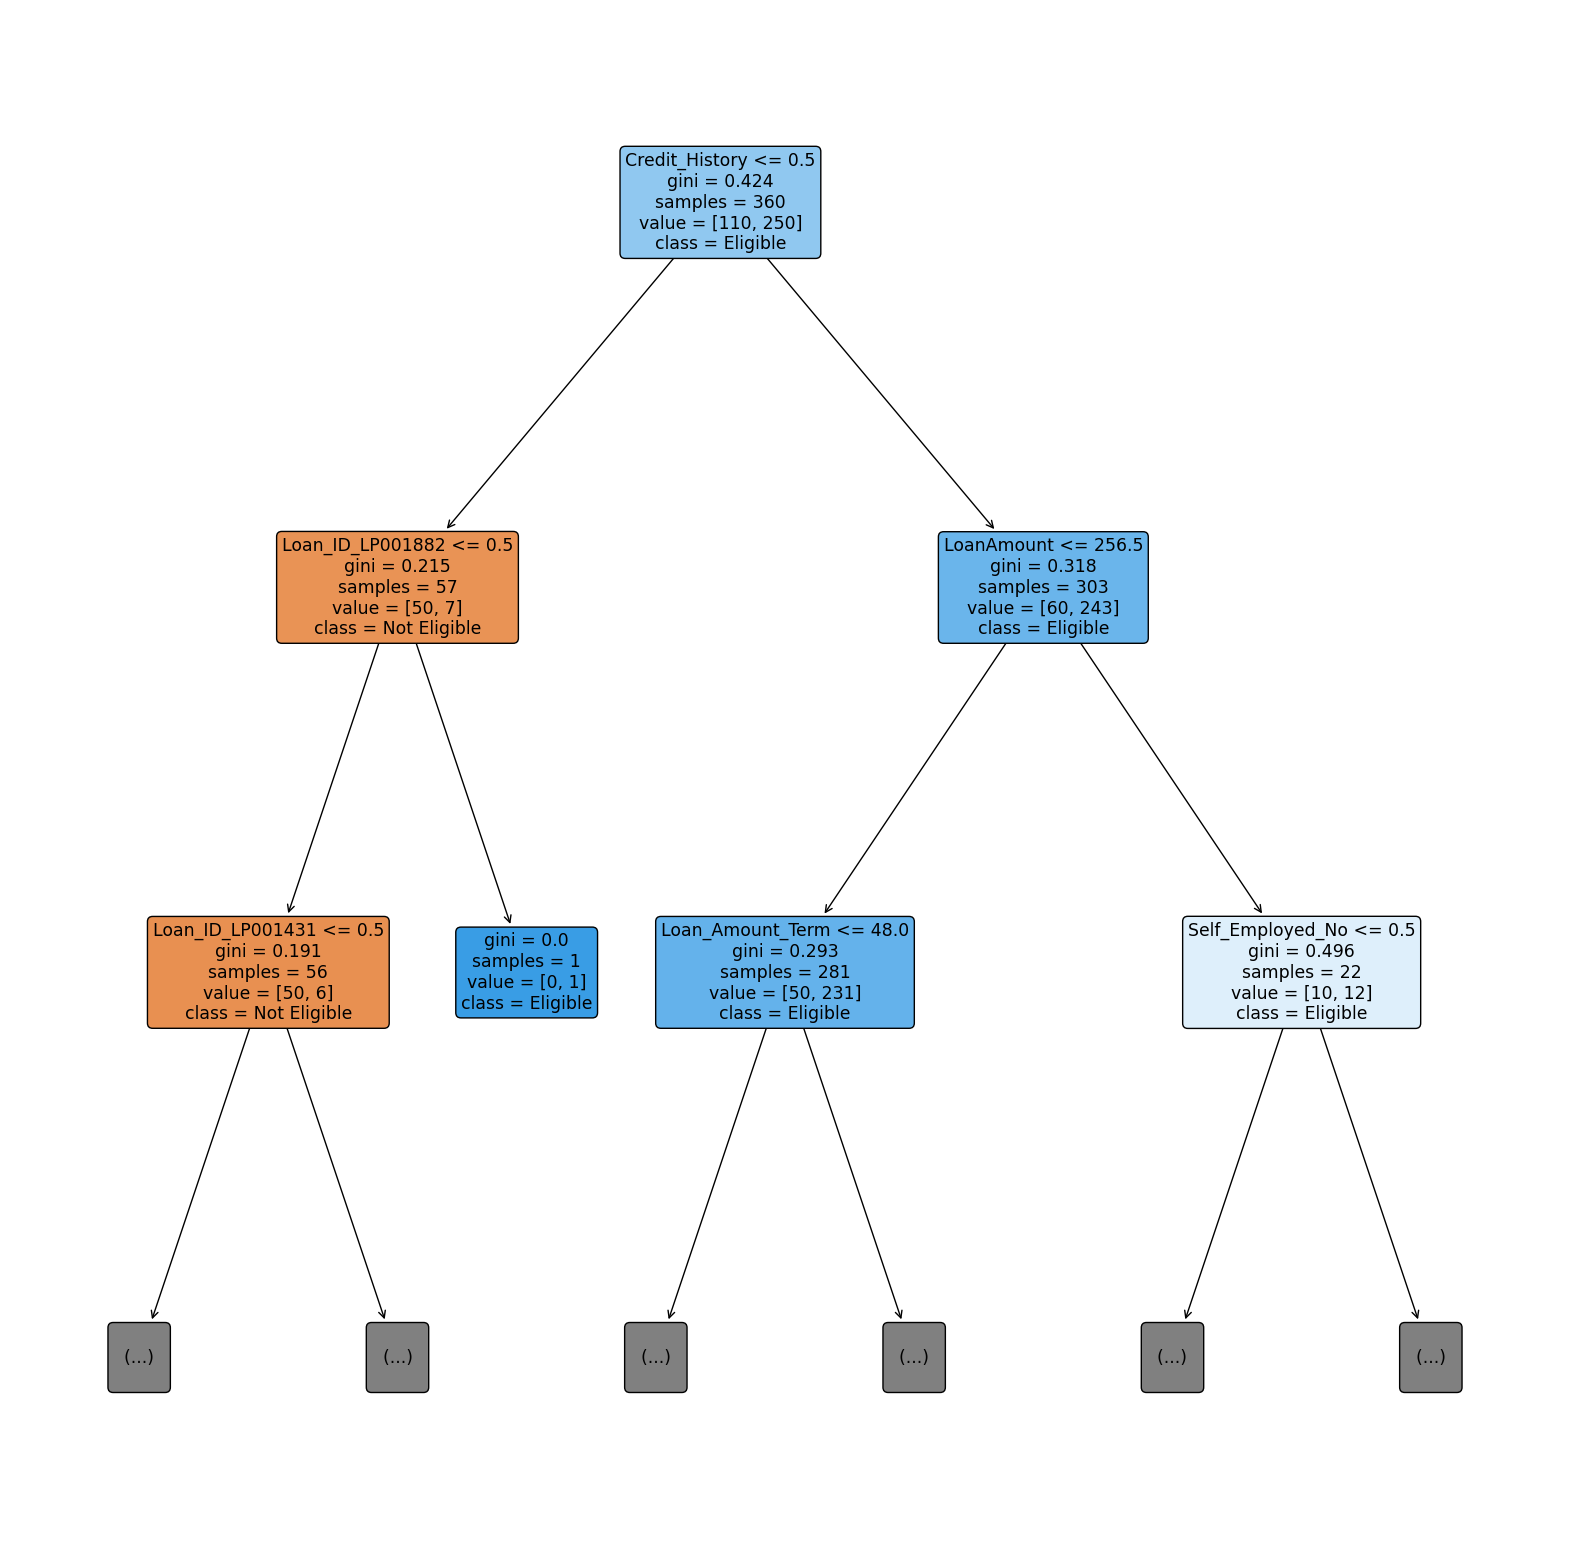

In [15]:
# Visualize the decision tree
plt.figure(figsize=(20, 20))
plot_tree(clf, feature_names=X.columns, class_names=['Not Eligible', 'Eligible'], filled=True, rounded=True,max_depth=2)
plt.show()

In [16]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)



Feature Importances:
               Feature  Importance
4       Credit_History    0.289698
2           LoanAmount    0.090304
0      ApplicantIncome    0.052607
1    CoapplicantIncome    0.038670
3     Loan_Amount_Term    0.033268
..                 ...         ...
174   Loan_ID_LP001720    0.000000
173   Loan_ID_LP001716    0.000000
172   Loan_ID_LP001715    0.000000
171   Loan_ID_LP001713    0.000000
250   Loan_ID_LP002002    0.000000

[500 rows x 2 columns]
